In [2]:
import matplotlib.pyplot as plt    
import numpy as np                 
import time      
import math       
import random

In [3]:
class LIF():
    def __init__(self, I, T=100, dt=0.1, neuron_type=1,
    V_th=-45, V_rest=-70, V_init=-80, V_reset=-65, V_spike=5, g_L=10, tau_m=20, delta_T=1, theta_r_h=-55, a=0.01, b=0.5, tau_w=1):

        self.neuron_type = neuron_type
        self.v_t = []
        self.fire_count = 0
        self.v = V_init
        self.V_init= V_init 
        self.V_th = V_th 
        self.V_rest = V_rest 
        self.V_reset = V_reset
        self.V_spike = V_spike
        self.g_L = g_L 
        self.tau_m = tau_m 
        self.tau_w = tau_w
        self.I = I
        self.T = T 
        self.dt = dt

    def start(self):
        t = 0
        while t <= self.T:
            dv = (-(self.v - self.V_rest) + self.I(t) * self.g_L)* (self.dt/self.tau_m)

            self.v += dv * self.dt
            if self.neuron_type == -1:
                print(self.v)
            is_spike = False
            if self.v >= self.V_th:
                self.v_t.append(self.v + self.V_spike)
                self.fire_count += 1
                self.v = self.V_reset
                is_spike = True
            else:
                self.v_t.append(self.v)

            t += self.dt

            yield {'u': self.v, 'is_spike': is_spike}

    def v_t_plot(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.v_t)))), self.v_t)
        plt.show()
        self.a

In [4]:
class STDP:
    def __init__(self, neurons, connections, weights, delay=1, iterations=1000):
        self.neurons = neurons
        self.neuron_action = []
        for lif in neurons:
            self.neuron_action.append(lif.start())
        self.connections = connections
        self.weights = weights
        self.iterations = iterations
        self.spikes = []
        self.spikes_time = []
        self.delay = delay
        self.spikes_effect = []
        self.time_range = []
        self.w_t = [[0] * self.iterations for _ in range(len(connections))]
        
    def start(self):
        self.spikes_effect = [[0] * len(self.neurons) for _ in range(self.iterations)]
        for t in range(self.iterations):
            self.time_range.append(t)
            
            for i in range(len(self.neuron_action)):
                action_info = next(self.neuron_action[i])
                if action_info['is_spike']:
                    self.spikes.append(i+1)
                    self.spikes_time.append(t)
                    idx = 0
                    
                    for connection in self.connections:
                        if connection[0] == i+1:
                            if t+self.delay < self.iterations:
                                self.spikes_effect[t + self.delay][connection[1]-1] += self.weights[idx]

                            spike_idx = len(self.spikes)-1
                            for spike in reversed(self.spikes):
                                if spike == connection[1]:
                                    t_post_minus_t_pre = self.spikes_time[spike_idx] - t
                                    self.weights[idx] = self.weights[idx] + 25*math.exp(-abs(t_post_minus_t_pre)/5)
                                    break
                                spike_idx -= 1

                        elif connection[1] == i+1:
                            for spike in reversed(self.spikes):
                                if spike == connection[0]:
                                    t_post_minus_t_pre = t - self.spikes_time[spike_idx]
                                    self.weights[idx] = self.weights[idx] - 25*math.exp(-abs(t_post_minus_t_pre)/5)
                                    break
                        idx += 1

                connection_idx = 0
                for weight in self.weights:
                    self.w_t[connection_idx][t] = self.weights[connection_idx]
                    connection_idx += 1

            for i in range(len(self.neurons)):
                self.neurons[i].v += self.spikes_effect[t][i]
        print(self.weights)
      
    def u_plot(self):
        legend = []
        for i in range(len(self.neurons)):
            plt.plot(list(map(lambda j: j * self.neurons[i].dt, range(len(self.neurons[i].v_t)))), self.neurons[i].v_t)
            legend.append('Neuron ' + str(i+1))
        plt.legend(legend)
        
    def scatter_plot(self):
        plt.scatter(self.spikes_time, self.spikes, color='green', s=5)
        
    def wt_plot(self, pre, post):
        i = 0
        for connection in self.connections:
            if connection[0] == pre and connection[1] == post:
                break
            i += 1
        plt.plot(self.time_range, self.w_t[i], color='green')

In [5]:
plt.style.use(['dark_background'])

In [6]:
I1 = lambda x: 60
I2 = lambda x: 20
I3 = lambda x: 40
neuron1 = LIF(I=I1)
neuron2 = LIF(I=I2)
neuron3 = LIF(I=I3)

neurons = [neuron1, neuron2, neuron3]
connections = [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]
weights = [5, 5, 5, 5, 5, 5]

In [7]:
stdp = STDP(neurons, connections, weights)
stdp.start()

[1681.4980615987085, -19.316886150578593, 1715.8641925469694, 5.000760812076495, 4.344730529274715, 4.999239187923505]


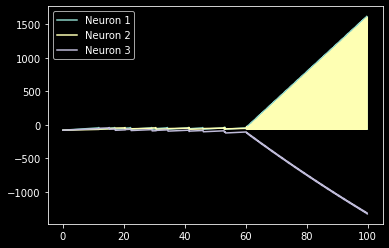

In [8]:
stdp.u_plot()

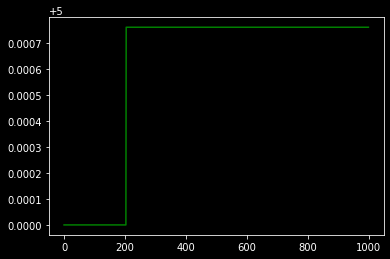

In [9]:
stdp.wt_plot(2, 3)

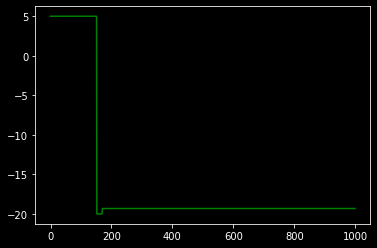

In [10]:
stdp.wt_plot(1, 3)

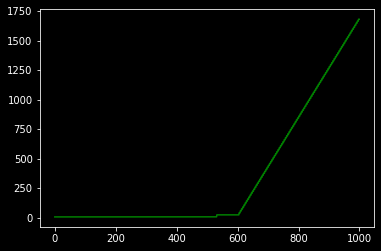

In [11]:
stdp.wt_plot(1, 2)

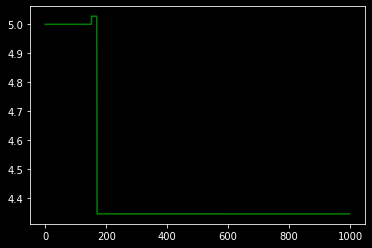

In [12]:
stdp.wt_plot(3, 1)

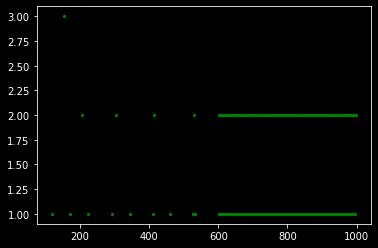

In [13]:
stdp.scatter_plot()

In [14]:
I1 = lambda x: 20 * (math.sin(x/10) + 0.6)
I2 = lambda x: 30 * (math.sin(x/10) + 0.3)
I3 = lambda x: 40 * (math.cos(x/10) + 0.9)
neuron1 = LIF(I=I1)
neuron2 = LIF(I=I2)
neuron3 = LIF(I=I3)

neurons = [neuron1, neuron2, neuron3]
connections = [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]
weights = [5, 5, 5, 5, 5, 5]

In [15]:
stdp = STDP(neurons, connections, weights)
stdp.start()

[18.613892092461434, 27.282778370512837, 2896.48453828127, 30.986161024614013, 2890.9597472985497, 2870.7723669462302]


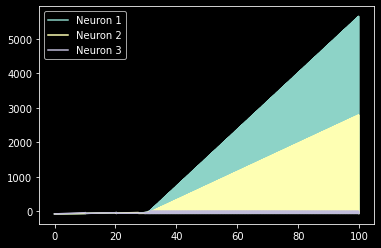

In [16]:
stdp.u_plot()

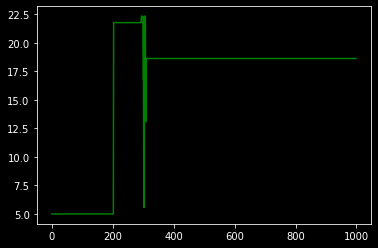

In [17]:
stdp.wt_plot(1, 2)

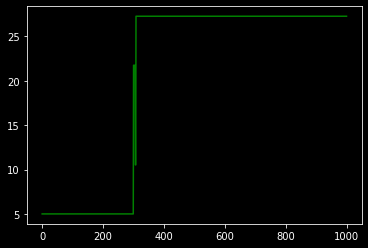

In [18]:
stdp.wt_plot(1, 3)

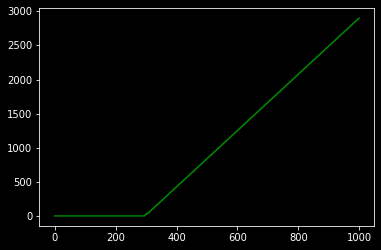

In [19]:
stdp.wt_plot(2, 1)

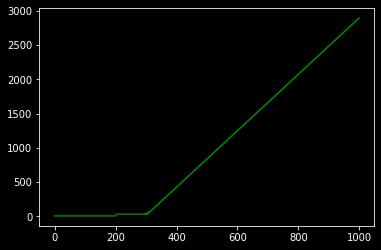

In [20]:
stdp.wt_plot(3, 1)

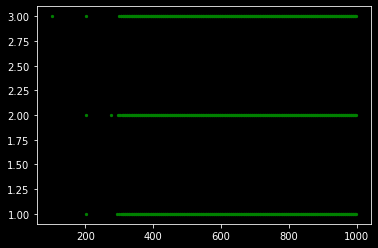

In [21]:
stdp.scatter_plot()

In [22]:
I1 = lambda x: 5 * x
I2 = lambda x: 3 * x
I3 = lambda x: 2 * x
neuron1 = LIF(I=I1)
neuron2 = LIF(I=I2)
neuron3 = LIF(I=I3)

neurons = [neuron1, neuron2, neuron3]
connections = [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]
weights = [5, 5, 5, 5, 5, 5]

In [23]:
stdp = STDP(neurons, connections, weights)
stdp.start()

[1528.187307396355, -19.88693140606008, 1530.4105238035152, -19.999999996172452, 21.644932556951062, 16.23322409910299]


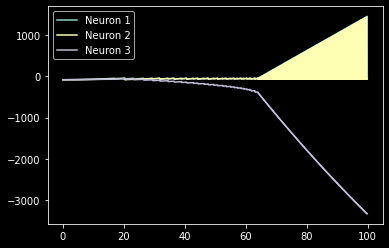

In [24]:
stdp.u_plot()

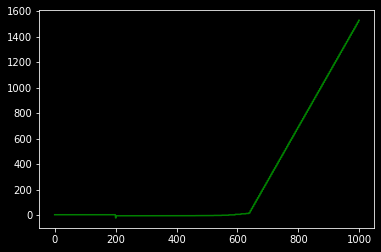

In [25]:
stdp.wt_plot(1, 2)

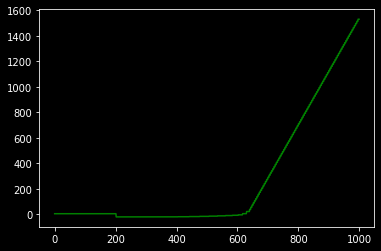

In [26]:
stdp.wt_plot(2, 1)

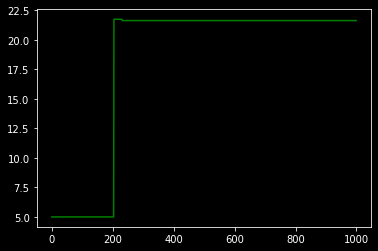

In [27]:
stdp.wt_plot(3, 1)

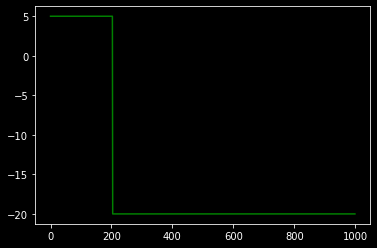

In [28]:
stdp.wt_plot(2, 3)

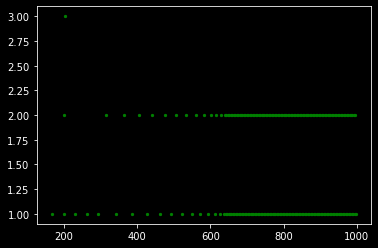

In [29]:
stdp.scatter_plot()

In [30]:
class RSTDP:
    def __init__(self, neurons, connections, weights ,output_layer, target_neuron, mode='train', delay=1, iterations=1000):
        self.neurons = neurons
        self.mode = mode
        self.output_layer = output_layer
        self.target_neuron = target_neuron
        self.neroun_action = []
        for i in neurons:
            self.neroun_action.append(i.start())

        self.connections = connections
        self.weights = weights
        self.iterations = iterations
        self.spikes = []
        self.spikes_time = []
        self.delay = delay
        self.spikes_effect = []
        self.time_range = []
        self.w_t = [[0] * self.iterations for _ in range(len(connections))]
    
    def start(self):
        self.spikes_effect = [[0] * len(self.neurons) for _ in range(self.iterations)]
        for t in range(self.iterations):
            self.time_range.append(t)
      
            for i in range(len(self.neroun_action)):
                action_info = next(self.neroun_action[i])
                if action_info['is_spike']:
                    if i+1 in self.output_layer:
                        if self.mode == 'train':
                            if i+1 == self.target_neuron:
                                DA = 10
                            else:
                                DA = 1/2
                            connection_idx = 0
                            for weight in self.weights:
                                self.weights[connection_idx] *= DA
                                connection_idx += 1
                        if self.mode == 'test':
                            return self.weights, t, i+1 == self.target_neuron
                    self.spikes.append(i + 1)
                    self.spikes_time.append(t)
                    idx = 0
                    for connection in self.connections:
                        if connection[0] == i+1:                            
                            if t+self.delay < self.iterations:
                                self.spikes_effect[t + self.delay][connection[1]-1] += self.weights[idx]
                            if self.mode == 'train':
                                spike_idx = len(self.spikes)-1
                                for spike in reversed(self.spikes):
                                    if spike == connection[1]:
                                        t_post_minus_t_pre = self.spikes_time[spike_idx] - t
                                        self.weights[idx] = self.weights[idx] + 25*math.exp(-abs(t_post_minus_t_pre)/5)
                                        break
                                    spike_idx -= 1
                        elif connection[1] == i+1:
                            if self.mode == 'train':
                                for spike in reversed(self.spikes):
                                    if spike == connection[0]:
                                        t_post_minus_t_pre = t - self.spikes_time[spike_idx]
                                        self.weights[idx] = self.weights[idx] - 25*math.exp(-abs(t_post_minus_t_pre)/5)
                                        break
                        idx += 1
                connection_idx = 0
                for weight in self.weights:
                    self.w_t[connection_idx][t] = self.weights[connection_idx]
                    connection_idx += 1

            for i in range(len(self.neurons)):
                self.neurons[i].v += self.spikes_effect[t][i]

        if self.mode == 'train':
            return self.weights, self.iterations
        else: 
            return self.weights, self.iterations, False

In [31]:
def train(step_number, input_currents, target_neuron, weights):
    neurons = []

    for iterator in range(5):
        neurons.append(LIF(I=lambda x: input_currents[iterator]*10))
    for iterator in range(2):
        neurons.append(LIF(I=lambda x: 0))

    connections =  [(1, 6), (1, 7), (2, 6), (2, 7), (3, 6), (3, 7), (4, 6), (4, 7), (5, 6), (5, 7)]
    if step_number == 1:
        weights = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
    rstdp = RSTDP(neurons, connections, weights, output_layer = [6,7], target_neuron = target_neuron + 6, mode='train')
    weights, ending_iteration = rstdp.start()
    print(ending_iteration)
    return weights

def test(input_currents, target_neuron, weights):
    neurons = []

    for iterator in range(5):
        neurons.append(LIF(I=lambda x: input_currents[iterator]*10))
    for iterator in range(2):
        neurons.append(LIF(I=lambda x: 0))

    connections = [(1, 6), (1, 7), (2, 6), (2, 7), (3, 6), (3, 7), (4, 6), (4, 7), (5, 6), (5, 7)]

    rstdp = RSTDP(neurons, connections, weights, output_layer = [6,7], target_neuron = target_neuron + 6, mode='test')
    weights, ending_iteration, last_spike = rstdp.start()
    print(ending_iteration)
    print(last_spike)
    return weights

In [32]:
import pandas as pd
data = pd.read_excel('./CN_3_DATASET.xlsx')
data

,test,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,inpput_neuron_number,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10
1,1.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0
2,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
3,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0
5,5.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
6,output_neuron_number,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,inpput_neuron_number,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10


In [33]:
train_list = [([1,1,0,0,0], 1), 
              ([2,1,1,0,0], 1), 
              ([3,1,0,0,0], 1), 
              ([2,0,0,0,0], 1), 
              ([1,1,0,0,1], 0), 
              ([1,0,0,0,2], 0), 
              ([0,1,0,3,0], 0), 
              ([0,0,0,1,1], 0), 
              ([0,0,0,0,1], 0), 
              ([2,2,2,1,2], 1)]

test_list = [([1,0,0,0,0], 1), 
             ([0,1,0,0,0], 1), 
             ([0,2,0,0,0], 1), 
             ([2,2,1,0,0], 1), 
             ([1,2,0,0,0], 1), 
             ([1,0,0,0,3], 0), 
             ([3,1,0,2,3], 0), 
             ([0,0,2,2,2], 0), 
             ([1,2,0,1,1], 1), 
             ([2,2,2,3,3], 0)]

In [34]:
weights = []
learning_step = 1
for data in train_list:
    weights = train(step_number = learning_step, input_currents = data[0], target_neuron = data[1], weights = weights)
    print(weights)
    learning_step += 1

1000
[-150.0, 75.0, -150.0, 75.0, -150.0, 75.0, -150.0, 75.0, -150.0, 75.0]
1000
[-1500.0, 725.0, -1500.0, 725.0, -1500.0, 725.0, -1500.0, 725.0, -1500.0, 725.0]
1000
[-15000.0, 7225.0, -15000.0, 7225.0, -15000.0, 7225.0, -15000.0, 7225.0, -15000.0, 7225.0]
1000
[-15000.0, 7225.0, -15000.0, 7225.0, -15000.0, 7225.0, -15000.0, 7225.0, -15000.0, 7225.0]
1000
[-7500.0, 3587.5, -7500.0, 3587.5, -7500.0, 3587.5, -7500.0, 3587.5, -7500.0, 3587.5]
1000
[-7500.0, 3587.5, -7500.0, 3587.5, -7500.0, 3587.5, -7500.0, 3587.5, -7500.0, 3587.5]
1000
[-3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75]
1000
[-3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75]
1000
[-3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75, -3750.0, 1768.75]
1000
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0]


In [35]:
for data in test_list:
    weights= test(input_currents = data[0], target_neuron = data[1], weights = weights)
    print(weights)

1000
False
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0]
767
True
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0]
366
True
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0]
366
True
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0]
366
True
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0]
1000
False
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0]
767
False
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0]
1000
False
[-3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766250.0, -3750000.0, 1766